In [146]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import mstats
import statsmodels.api as sm

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [147]:
df = pd.read_csv("crimes.csv")

In [148]:
df = df.drop(['Rape\r(revised\rdefinition)1'], axis=1)

In [149]:
df = df.rename(columns={'Violent\rcrime': 'Violent Crime', 
                        'Murder and\rnonnegligent\rmanslaughter': 'Murder',
                       'Rape\r(legacy\rdefinition)2' : 'Rape',
                       'Aggravated\rassault' : 'Aggravated Assault',
                       'Property\rcrime': 'Property Crime',
                       'Larceny-\rtheft': 'Larceny Theft',
                       'Motor\rvehicle\rtheft': 'Motor vehicle Theft',
                       'Arson3': 'Arson'})
print(df.head())

                       City Population Violent Crime  Murder Rape Robbery  \
0             Adams Village      1,861             0       0    0       0   
1  Addison Town and Village      2,577             3       0    0       0   
2             Akron Village      2,846             3       0    0       0   
3                    Albany     97,956           791       8   30     227   
4            Albion Village      6,388            23       0    3       4   

  Aggravated Assault Property Crime Burglary Larceny Theft  \
0                  0             12        2            10   
1                  3             24        3            20   
2                  3             16        1            15   
3                526          4,090      705         3,243   
4                 16            223       53           165   

  Motor vehicle Theft  Arson  
0                   0  0.000  
1                   1  0.000  
2                   0  0.000  
3                 142    nan  
4        

In [150]:
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Larceny Theft'] = df['Larceny Theft'].str.replace(',', '')
df['Property Crime'] = df['Property Crime'].str.replace(',', '')
df['Burglary'] = df['Burglary'].str.replace(',', '')
df['Population'] = df['Population'].str.replace(',', '')
df['Poperty Crime'] = df['Property Crime'].str.replace(',', '')

In [151]:
df['Property Crime'] = pd.to_numeric(df['Property Crime'])
df['Population'] = pd.to_numeric(df['Population'])

In [152]:
df['Robbery'] = pd.to_numeric(df['Robbery'])
df['Robbery Cat'] = np.where(df['Robbery']>0, 1, 0)
df['Arson']=df['Arson'].fillna(0)
print(df.head())

                       City  Population Violent Crime  Murder Rape  Robbery  \
0             Adams Village        1861             0       0    0        0   
1  Addison Town and Village        2577             3       0    0        0   
2             Akron Village        2846             3       0    0        0   
3                    Albany       97956           791       8   30      227   
4            Albion Village        6388            23       0    3        4   

  Aggravated Assault  Property Crime Burglary Larceny Theft  \
0                  0              12        2            10   
1                  3              24        3            20   
2                  3              16        1            15   
3                526            4090      705          3243   
4                 16             223       53           165   

  Motor vehicle Theft  Arson Poperty Crime  Robbery Cat  
0                   0  0.000            12            0  
1                   1  0.000  

In [153]:
df['Murder'] = pd.to_numeric(df['Murder'])
df['Murder Cat'] = np.where(df['Murder']>0, 1, 0)
print(df.head())

                       City  Population Violent Crime  Murder Rape  Robbery  \
0             Adams Village        1861             0       0    0        0   
1  Addison Town and Village        2577             3       0    0        0   
2             Akron Village        2846             3       0    0        0   
3                    Albany       97956           791       8   30      227   
4            Albion Village        6388            23       0    3        4   

  Aggravated Assault  Property Crime Burglary Larceny Theft  \
0                  0              12        2            10   
1                  3              24        3            20   
2                  3              16        1            15   
3                526            4090      705          3243   
4                 16             223       53           165   

  Motor vehicle Theft  Arson Poperty Crime  Robbery Cat  Murder Cat  
0                   0  0.000            12            0           0  
1     

In [154]:
print(df.skew())

Population       18.554
Murder           17.601
Robbery          18.425
Property Crime   18.165
Arson            14.412
Robbery Cat      -0.412
Murder Cat        2.074
dtype: float64


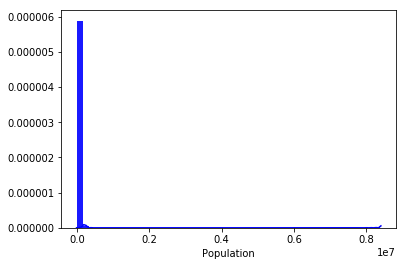

In [155]:
sns.distplot(df['Population'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [156]:
#Idx is index maximum
df['Population'].idxmax(axis=1)
df = df.drop(df.index[216])
#Drop row 216 as it's an anomaly data

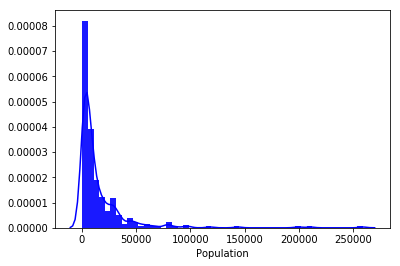

In [157]:
#Check if population is normally distributed
sns.distplot(df['Population'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119c317f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11976af60>]], dtype=object)

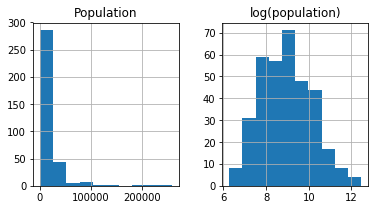

In [158]:
#Log the population variable 
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Population":df["Population"], "log(population)":np.log(df["Population"])})
population.hist(bins = 10)

In [159]:
df['Population'] = np.log(df["Population"])

In [160]:
print(df.head())

                       City  Population Violent Crime  Murder Rape  Robbery  \
0             Adams Village       7.529             0       0    0        0   
1  Addison Town and Village       7.854             3       0    0        0   
2             Akron Village       7.954             3       0    0        0   
3                    Albany      11.492           791       8   30      227   
4            Albion Village       8.762            23       0    3        4   

  Aggravated Assault  Property Crime Burglary Larceny Theft  \
0                  0              12        2            10   
1                  3              24        3            20   
2                  3              16        1            15   
3                526            4090      705          3243   
4                 16             223       53           165   

  Motor vehicle Theft  Arson Poperty Crime  Robbery Cat  Murder Cat  
0                   0  0.000            12            0           0  
1     

In [161]:
#If your data is suffering from nonlinearity, transform the dependent variables using sqrt, log, square, etc.
df['Population Squared'] = df['Population']**2
print(df.head())

                       City  Population Violent Crime  Murder Rape  Robbery  \
0             Adams Village       7.529             0       0    0        0   
1  Addison Town and Village       7.854             3       0    0        0   
2             Akron Village       7.954             3       0    0        0   
3                    Albany      11.492           791       8   30      227   
4            Albion Village       8.762            23       0    3        4   

  Aggravated Assault  Property Crime Burglary Larceny Theft  \
0                  0              12        2            10   
1                  3              24        3            20   
2                  3              16        1            15   
3                526            4090      705          3243   
4                 16             223       53           165   

  Motor vehicle Theft  Arson Poperty Crime  Robbery Cat  Murder Cat  \
0                   0  0.000            12            0           0   
1   

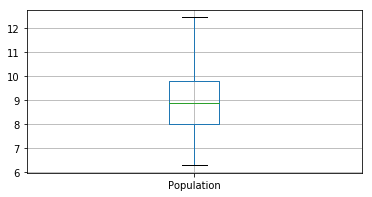

In [162]:
df.boxplot(column="Population")

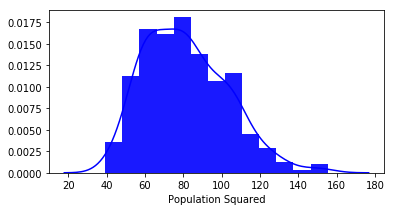

In [163]:
#Check if population squared is normally distributed
sns.distplot(df['Population Squared'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

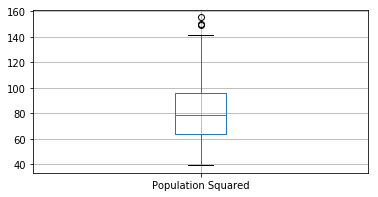

In [164]:
df.boxplot(column="Population Squared")

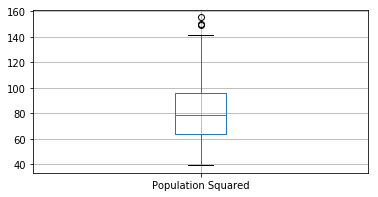

In [165]:
df.boxplot(column="Population Squared")

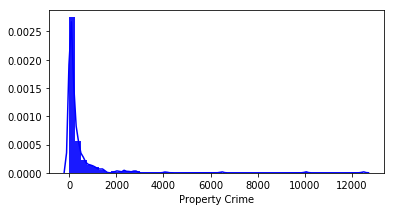

In [166]:
sns.distplot(df['Property Crime'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119438198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1191acd68>]], dtype=object)

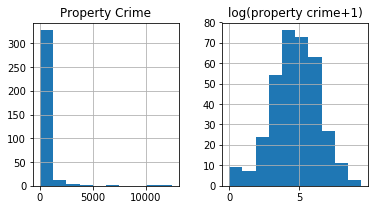

In [167]:
#Log the population variable 
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Property Crime":df["Property Crime"], "log(property crime+1)":np.log1p(df["Property Crime"])})
population.hist(bins = 10)

In [168]:
df['Property Crime'] = np.log1p(df["Property Crime"])

In [169]:
regr = linear_model.LinearRegression()
x = df[['Population', 'Population Squared', 'Murder Cat', 'Robbery Cat']]
y = df['Property Crime'].values.reshape(-1,1)
regr.fit(x,y)

#Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x,y))


Coefficients: 
 [[ 1.04101667 -0.00552825  0.26720445  0.88222846]]

Intercept: 
 [-4.70706671]

R-squared:
0.791041822862


In [136]:
X = df[['Population', 'Population Squared', 'Murder Cat', 'Robbery Cat']]
y = (df['Property Crime'])

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Property Crime   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     323.7
Date:                Mon, 11 Dec 2017   Prob (F-statistic):          7.32e-115
Time:                        11:37:18   Log-Likelihood:                -393.87
No. Observations:                 347   AIC:                             797.7
Df Residuals:                     342   BIC:                             817.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.7071      2.036     -2.312      0.021      -8.712      -0.702
Population             1.0410      0.452      2.301      0.022       0.151       1.931
Population Squared    -0.0055      0.025     -0.223      0.824      -0.054       0.043
Murder Cat             0.2672      0.142      1.887      0.060      -0.011       0.546
Robbery Cat            0.8822      0.105      8.367      0.000       0.675       1.090
==============================================================================
Omnibus:                       52.590   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.922
Skew:                          -0.870   Prob(JB):                     1.10e-20
Kurtosis:                       4.826   Cond. No.                     4.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

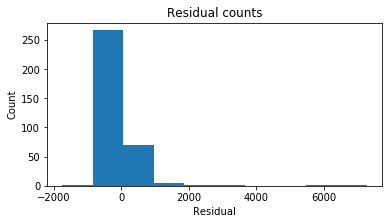

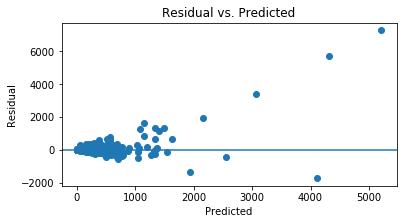

In [170]:
# Extract predicted values.
predicted = regr.predict(x).ravel()
predicted = np.expm1(predicted)
actual = df['Property Crime']
actual = np.expm1(actual)

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [139]:
correlation_matrix = x.corr()
display(correlation_matrix)

,Population,Population Squared,Murder Cat,Robbery Cat
Population,1.000,0.997,0.489,0.597
Population Squared,0.997,1.000,0.508,0.585
Murder Cat,0.489,0.508,1.000,0.311
Robbery Cat,0.597,0.585,0.311,1.000


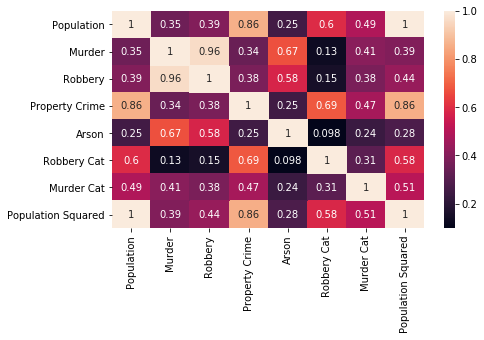

In [140]:
correlationMatrix = df.corr().abs()

plt.subplots(figsize=(7, 4))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()
